In [2]:
import pandas as pd
import numpy as np

In [4]:
def merge_and_drop_local_columns(file_path):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    df["parallelism"] = df["localParallelism"].combine_first(df["parallelism"])
    df.drop(columns=["localParallelism"], inplace=True)
    # Find all columns that have names starting with "local_"
    local_columns = [col for col in df.columns if col.startswith("local_")]
    # Process each local column
    for local_col in local_columns:
        # Get the corresponding non-local column name (removing "local_" prefix)
        non_local_col = local_col.replace("local_", "")
        # Merge data from local column with non-local column where the data is mutually exclusive
        df[non_local_col] = df.apply(lambda row: row[non_local_col] if pd.notnull(row[local_col]) else row[non_local_col], axis=1)
    # Drop the local columns
    df.drop(columns=local_columns, inplace=True)
    # Save the updated DataFrame back to a new CSV file
    new_file_path = file_path.replace(".csv", "_updated.csv")
    df.to_csv(new_file_path, index=False)
    return new_file_path
# Replace 'file_path.csv' with the path to your CSV file
csv_file_path = 'data_updated_updated_updated.csv'
updated_file_path = merge_and_drop_local_columns(csv_file_path)
print(f"Data merged and local columns dropped in the file '{csv_file_path}' and saved to '{updated_file_path}'.")

/tmp/ipykernel_6185/3856365194.py:3: DtypeWarning: Columns (5,64,71,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Data merged and local columns dropped in the file 'data_updated_updated_updated.csv' and saved to 'data_updated_updated_updated_updated.csv'.


In [5]:
data=pd.read_csv(updated_file_path)
data.columns

/tmp/ipykernel_6185/2053660499.py:1: DtypeWarning: Columns (5,62,69,72) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(updated_file_path)


Index(['id', 'query_id', 'execution_time', 'start_time', 'end_time', 'query',
       'base_cost', 'parsing_time', 'queueing_time', 'operator',
       'cost_percent', 'num_chunks', 'row_count_in', 'row_count_out',
       'parallelism', 'listing_time_percent', 'total_row_groups',
       'skipped_row_groups', 'parquet_reading_cost_percent_Percentage',
       'parquet_reading_cost_percent_Values',
       'filtering_cost_percent_Percentage', 'filtering_cost_percent_Values',
       'memory_consumption', 'total_query_time',
       'queue_blocked_time_Percentage', 'queue_blocked_time_Values',
       'cost_percent_str_Percentage', 'cost_percent_str_Values',
       'parquet_task_cost_percent_Percentage',
       'parquet_task_cost_percent_Values', 'open_time_percent_Percentage',
       'open_time_percent_Values', 'partitions', 'files', 'tasks',
       'rowgroup_listing_time_percent_Percentage',
       'rowgroup_listing_time_percent_Values',
       'partition_listing_time_percent_Percentage',
    

In [15]:
import pandas as pd

# Assuming you have loaded your dataset into a Pandas DataFrame, and the two columns of interest are 'column1' and 'column2'
# For example, if your DataFrame is called 'data', you can merge the columns and delete the originals as follows:

# Merge 'column1' into 'column2' where 'column2' is null
data['thread_duration_max'] = data['thread_duration_max'].combine_first(data['max_thread_duration'])

# Drop the original 'column1'
data.drop('max_thread_duration', axis=1, inplace=True)

# Now, 'column2' contains the merged values, and 'column1' has been deleted


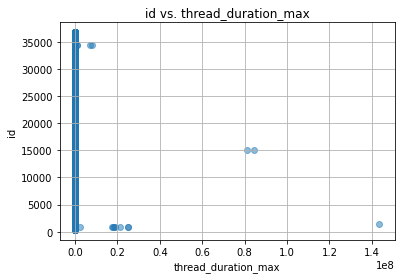

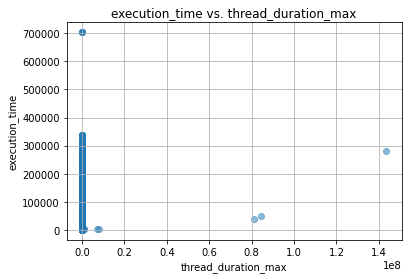

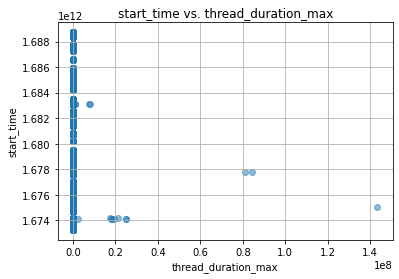

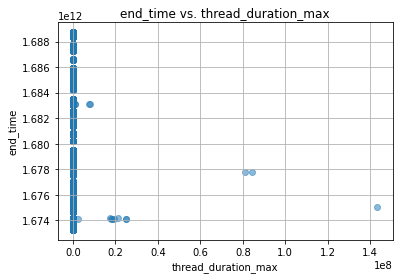

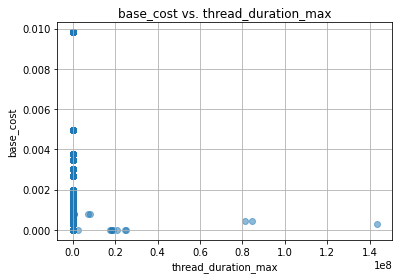

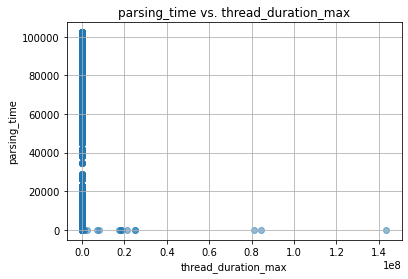

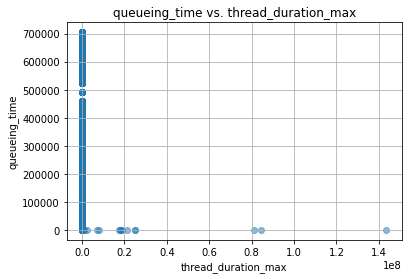

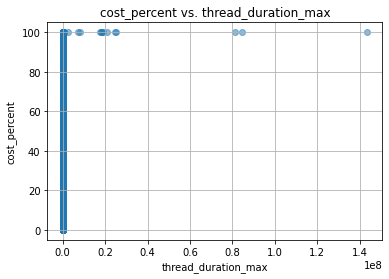

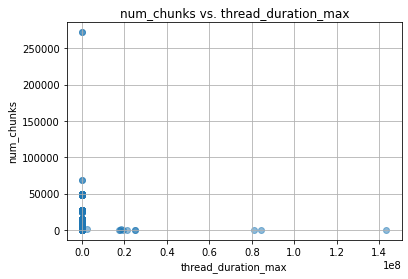

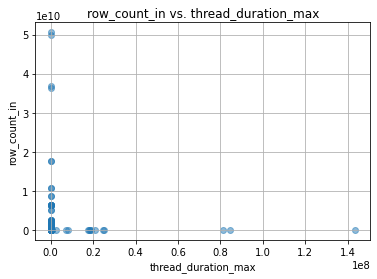

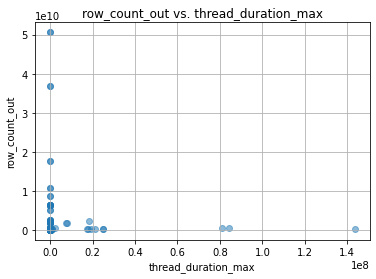

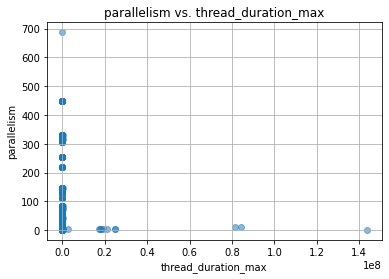

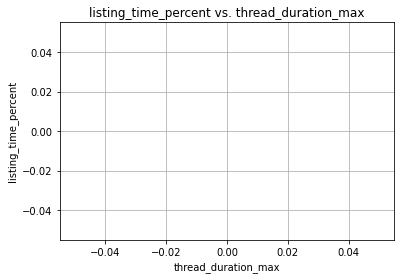

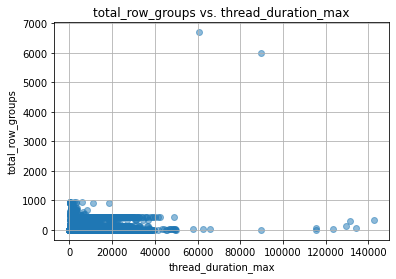

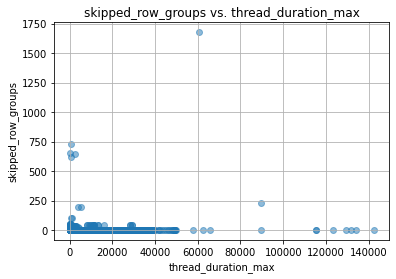

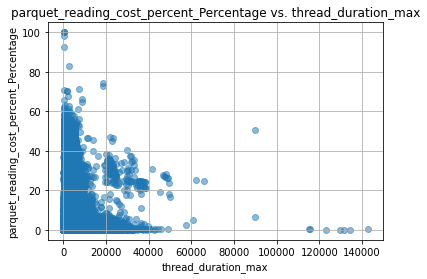

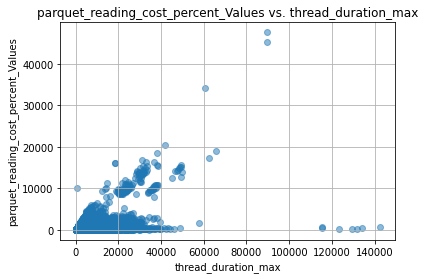

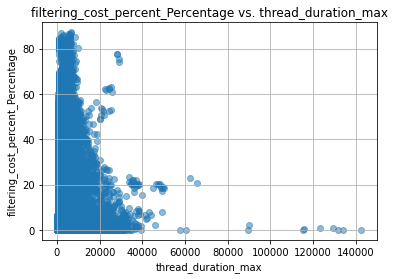

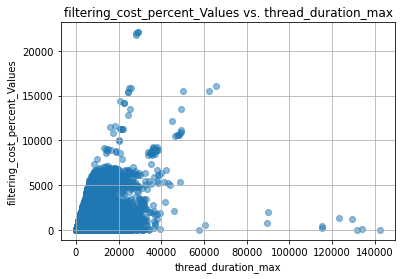

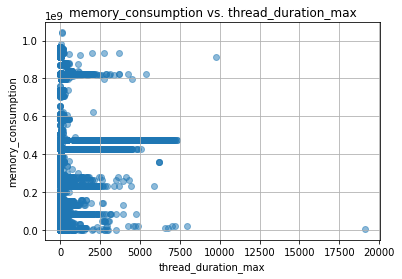

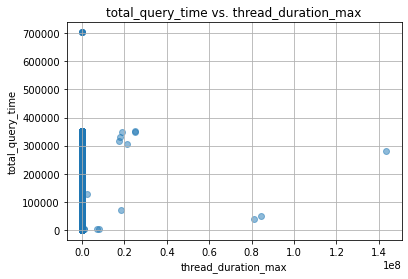

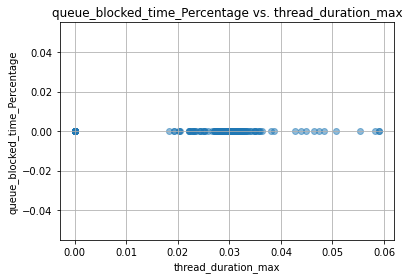

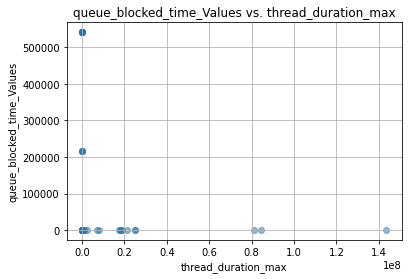

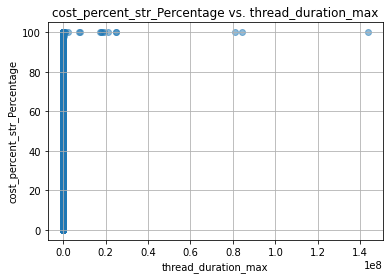

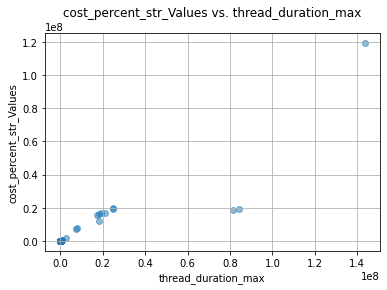

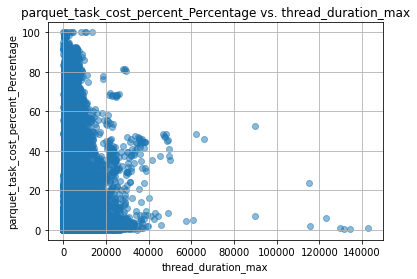

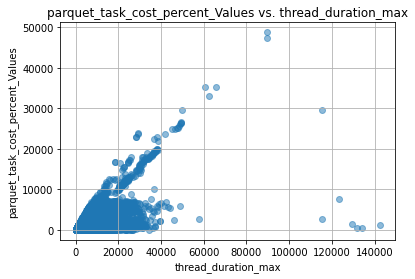

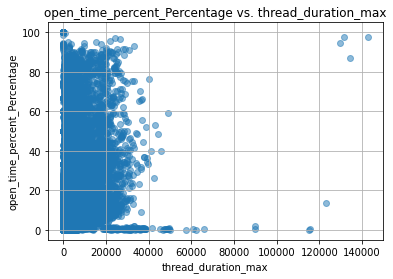

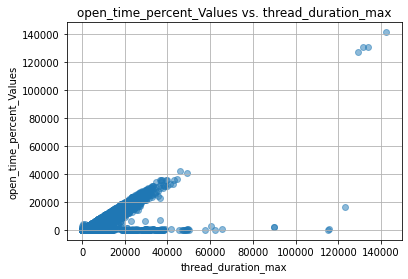

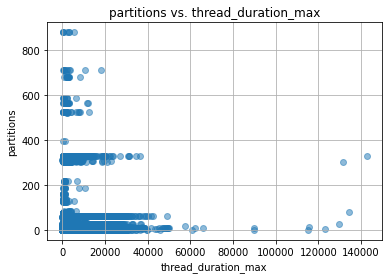

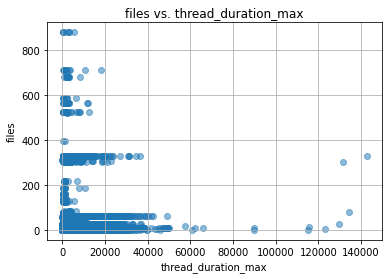

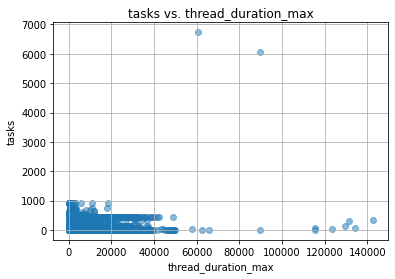

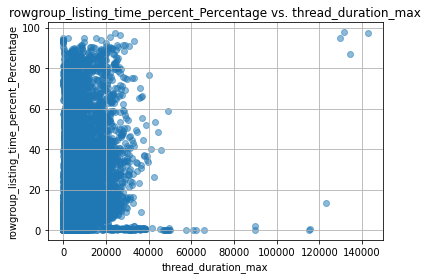

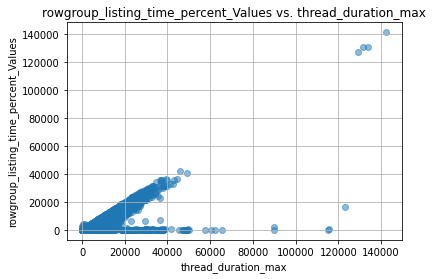

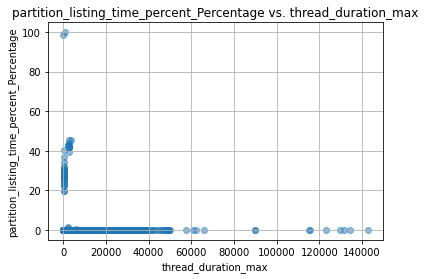

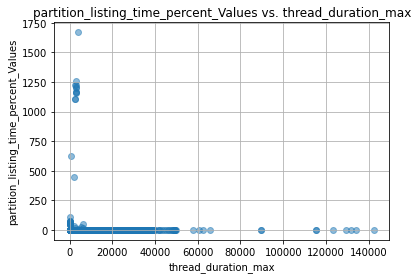

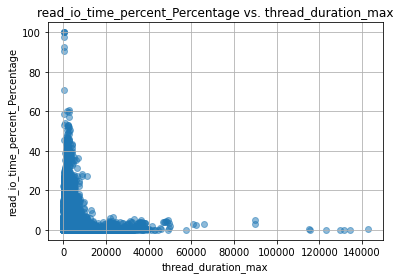

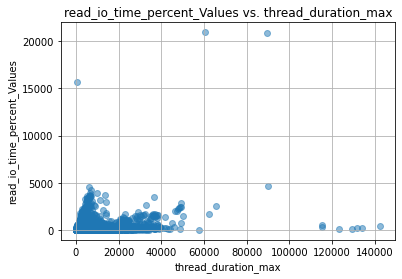

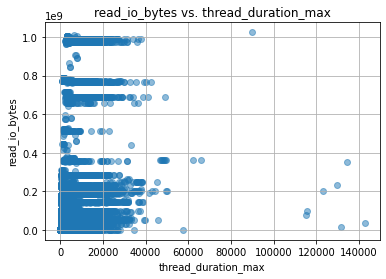

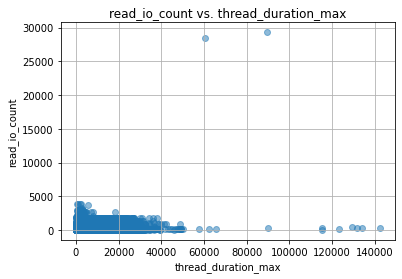

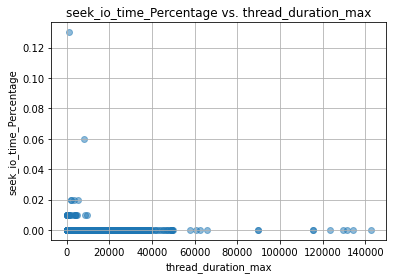

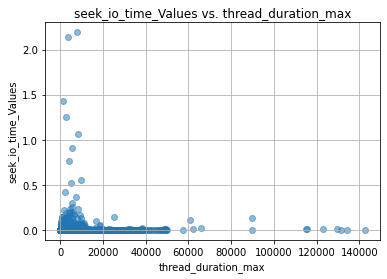

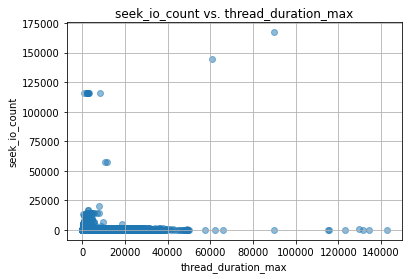

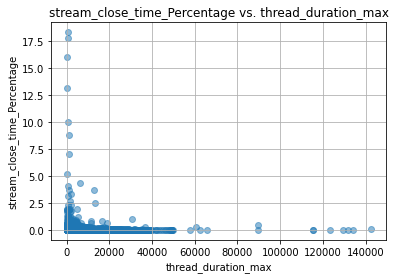

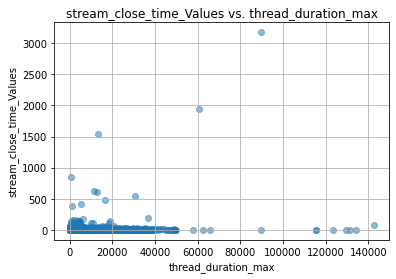

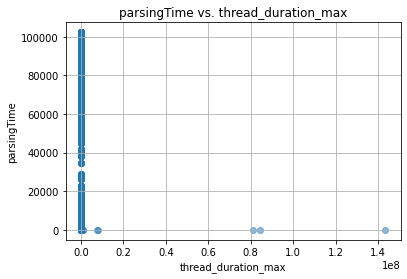

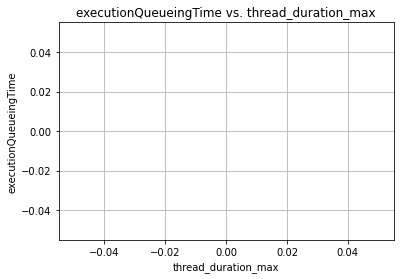

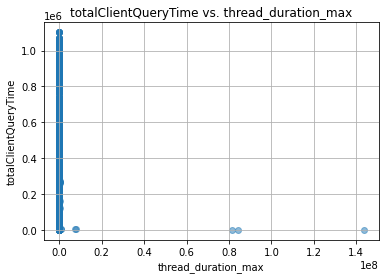

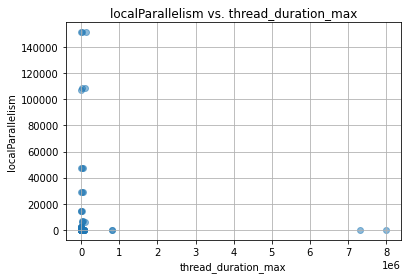

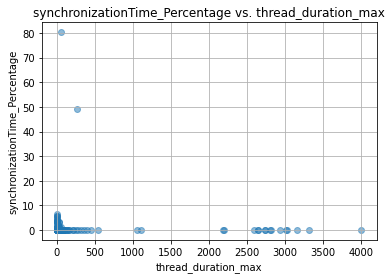

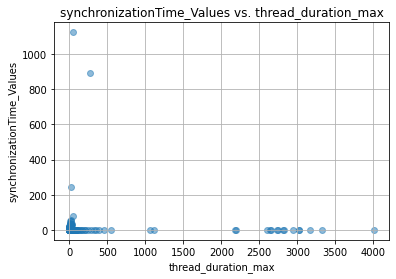

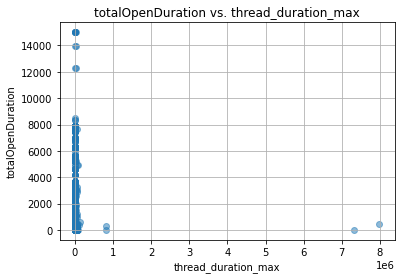

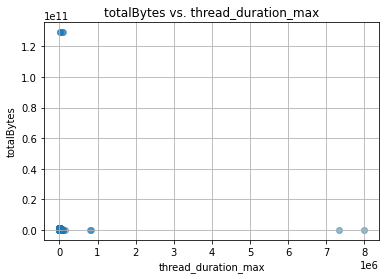

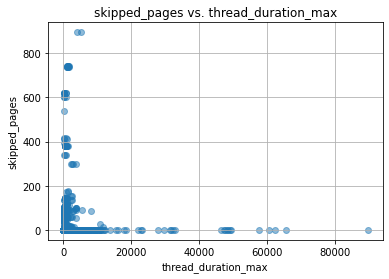

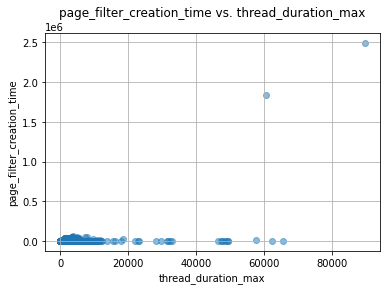

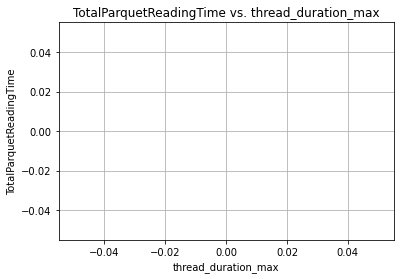

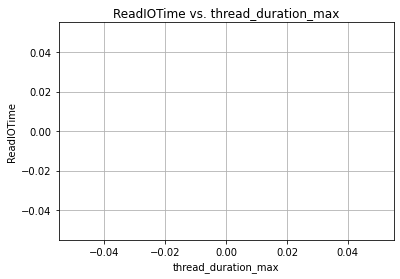

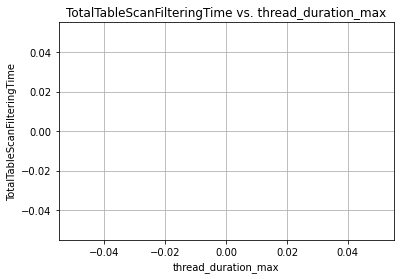

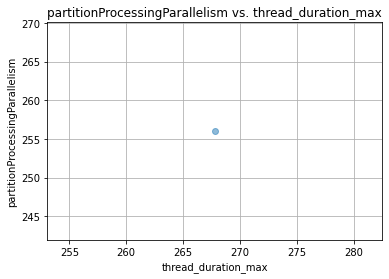

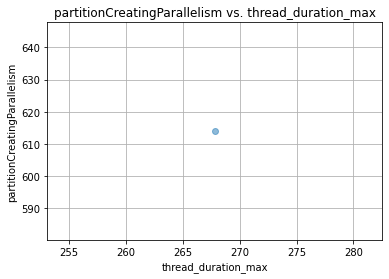

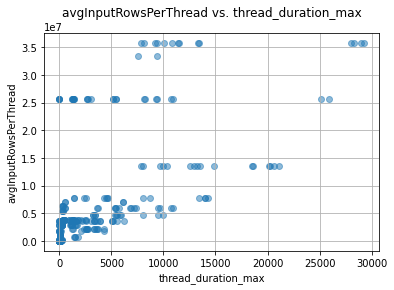

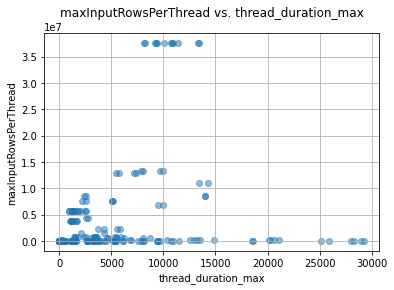

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
df=data
# Assuming you have a Pandas DataFrame called 'df' containing your data
# Replace 'total_query_time' with the column name you want to use as the reference column

# Scatter plots of numeric columns with respect to 'total_query_time'
reference_column = 'thread_duration_max'

# Filter the DataFrame to include only numeric columns
numeric_columns = df.select_dtypes(include=[float, int]).columns

# Create scatter plots for each numeric column
for column in numeric_columns:
    if column != reference_column:
        plt.scatter(df[reference_column], df[column], alpha=0.5)
        plt.xlabel(reference_column)
        plt.ylabel(column)
        plt.title(f"{column} vs. {reference_column}")
        plt.grid(True)
        plt.show()


In [14]:
data[(data['thread_duration_max'].notnull()) & (data['partitionCreatingParallelism'].notnull())]


,id,query_id,execution_time,start_time,end_time,query,base_cost,parsing_time,queueing_time,operator,...,ReadIOTime,TotalTableScanFilteringTime,partitioned,partitionProcessingParallelism,partitionCreatingParallelism,m_bShouldParallelizeRowGroups,max_thread_duration,avgInputRowsPerThread,maxInputRowsPerThread,firstChild
705,36571,Q118000-29-20230705.125510.707,1826.0,1.688562e+12,1.688562e+12,"SELECT ""invoices"".""currency_code"" AS ""currency...",0.000898,0,0,InMemoryAggregationOperator,...,NaN,NaN,True,256.0,614.0,NaN,NaN,NaN,NaN,PartInMemoryAggregationOperator


In [8]:
data.to_csv('final.csv')